In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize']=[10,7]

In [ ]:
from pycuda import gpuarray
import lagomorph as lm
width = 128
alpha=10.
beta=0.1
gamma=.01
np.random.seed(1)
defshape = [1,2,width,width]
xh = np.zeros(defshape).astype(np.float32)
xh[0,:,width//2,width//2] = [1000,0]
xh[0,:,width//4,3*width//4] = [0,1000]
m0 = gpuarray.to_gpu(np.ascontiguousarray(xh))
metric = lm.FluidMetric(alpha=alpha, beta=beta, gamma=gamma, shape=m0.shape, precision='single')
phiinv = lm.expmap(m0, metric, Nsteps=30, T=1)
plt.imshow(xh[0,0,...], cmap='gray')
plt.colorbar()

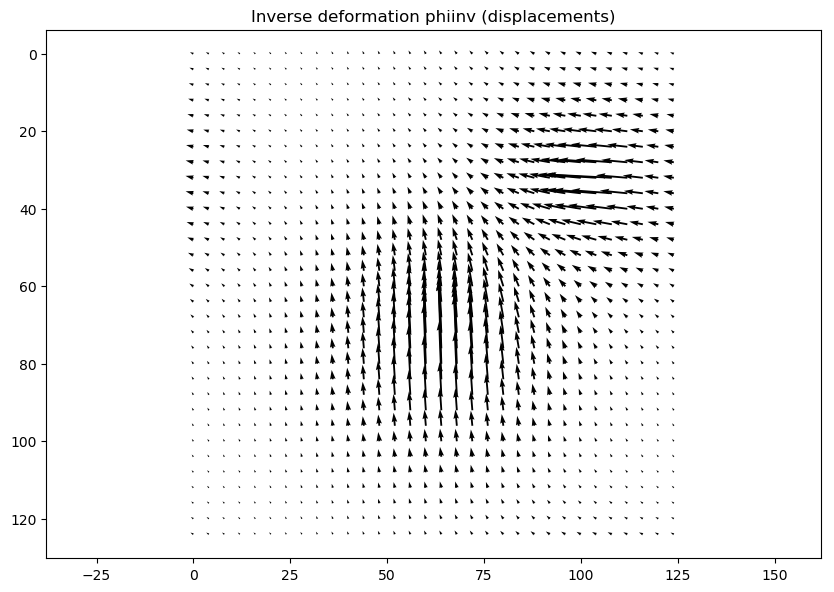

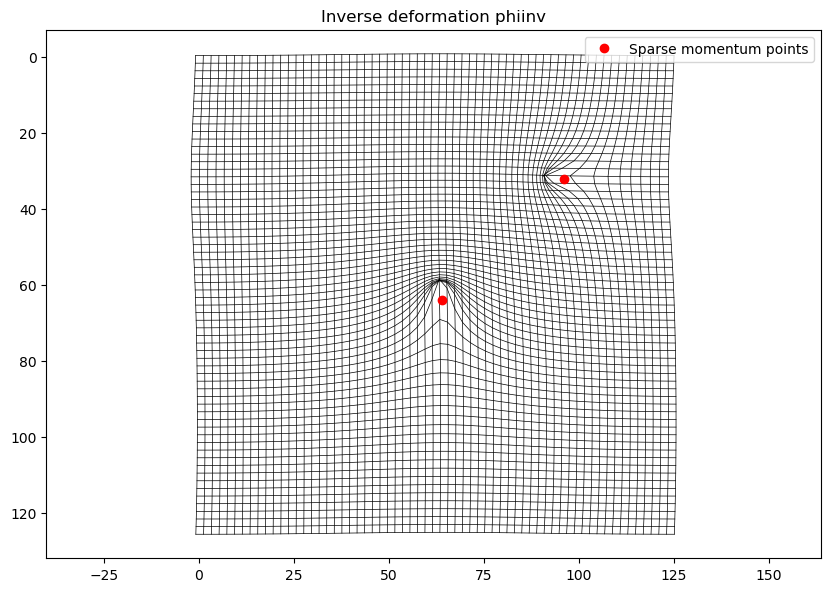

In [9]:
lm.quiver(phiinv.get())
plt.title('Inverse deformation phiinv (displacements)')
plt.figure()
lm.gridplot(phiinv, linewidth=.5)
plt.plot([width//2, 3*width//4], [width//2, width//4], 'or', label='Sparse momentum points')
plt.legend()
_=plt.title('Inverse deformation phiinv')